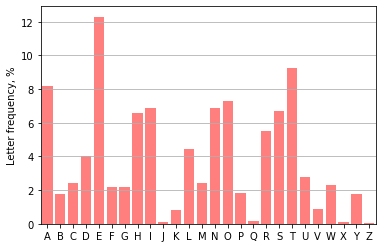

In [12]:
import numpy as np
import matplotlib.pyplot as plt

text_file = 'moby-dick.txt'

letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
# Initialize the dictionary of letter counts: {'A': 0, 'B': 0, ...}
lcount = dict([(l, 0) for l in letters])

# Read in the text and count the letter occurences
for l in open(text_file,"r", encoding='utf-8').read():
    try:
        lcount[l.upper()] += 1
    except KeyError:
        # Ignore characters that are not letters
        pass
# The total number of letters
norm = sum(lcount.values())

fig = plt.figure()
ax = fig.add_subplot(111)
# The bar chart, with letters along the horizontal axis and the calculated
# letter frequencies as percentages as the bar height
x = range(26)
ax.bar(x, [lcount[l]/norm * 100 for l in letters], width=0.8,
       color='r', alpha=0.5, align='center')
ax.set_xticks(x)
ax.set_xticklabels(letters)
ax.tick_params(axis='x', direction='out')
ax.set_xlim(-0.5, 25.5)
ax.yaxis.grid(True)
ax.set_ylabel('Letter frequency, %')
plt.show()
fig.savefig('Частота встречаемости букв в тексте романа «Моби Дик».png', dpi=500)

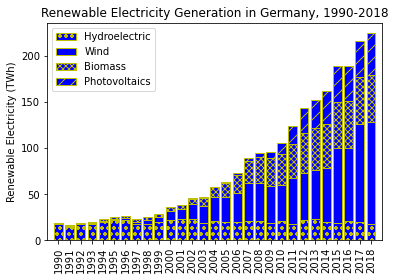

<Figure size 432x288 with 0 Axes>

In [13]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('germany-energy-sources.txt', skiprows=2, dtype='f8')
years = data[:,0]
n = len(years)

# GWh to TWh
data[:,1:] /= 1000

fig = plt.figure()
ax = fig.add_subplot(111)
sources = ('Hydroelectric', 'Wind', 'Biomass', 'Photovoltaics')
hatch = ['oo', '', 'xxxx', '//']
bottom = np.zeros(n)
bars = [None]*n
for i, source in enumerate(sources):
    bars[i] = ax.bar(years, bottom=bottom, height=data[:,i+1], color='b',
                    hatch=hatch[i], align='center', edgecolor='y')
    bottom += data[:,i+1]

ax.set_xticks(years)
plt.xticks(rotation=90)
ax.set_xlim(1989, 2019)
ax.set_ylabel('Renewable Electricity (TWh)')
ax.set_title('Renewable Electricity Generation in Germany, 1990-2018')
plt.legend(bars, sources, loc='best')
plt.show()
plt.draw()
fig.savefig('Визуализация производства электроэнергии из возобновляемых источников в Германии.png', dpi=500)

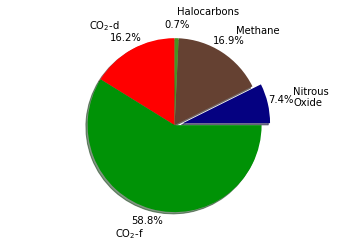

<Figure size 432x288 with 0 Axes>

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Annual greenhouse gas emissions, billion tons carbon equivalent (GtCe)
gas_emissions = np.array([(r'$\mathrm{CO_2}$-d', 2.2),
                          (r'$\mathrm{CO_2}$-f', 8.0),
                          ('Nitrous\nOxide', 1.0),
                          ('Methane', 2.3),
                          ('Halocarbons', 0.1)],
                         dtype=[('source', 'U17'), ('emission', 'f4')])

# 5 colours beige
colours = ['#FF0000', '#009206', '#050181', '#654132', '#479321']

explode = [0, 0, 0.1, 0, 0]

fig, ax = plt.subplots()
ax.axis('equal')        # So our pie looks round!
ax.pie(gas_emissions['emission'], colors=colours, shadow=True, startangle=90,
       explode=explode, labels=gas_emissions['source'], autopct='%.1f%%',
       pctdistance=1.15, labeldistance=1.3)

plt.show()
plt.draw()
fig.savefig('Круговая диаграмма данных о выбросе в атмосферу парниковых газов.png', dpi=500)

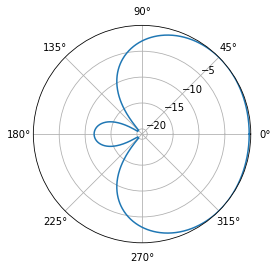

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def gain(d, w):
    """Return the power as a function of azimuthal angle, phi."""
    phi = np.linspace(0, 2*np.pi, 1000)
    psi = 2*np.pi * d / lam * np.cos(phi)
    A = w[0] + w[1]*np.exp(1j*psi)
    g = np.abs(A)**2
    return phi, g

def get_directive_gain(g, minDdBi=-20):
    """Return the "directive gain" of the antenna array producing gain g."""
    DdBi = 10 * np.log10(g / np.max(g))
    return np.clip(DdBi, minDdBi, None)

# Wavelength, antenna spacing, feed coefficients.
lam = 1
d = lam / 3
w = np.array([1, -1j])
# Calculate gain and directive gain; plot on a polar chart.
phi, g = gain(d, w)
DdBi = get_directive_gain(g)

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
ax.plot(phi, DdBi)
ax.set_rticks([-20, -15, -10, -5])
ax.set_rlabel_position(45)
plt.show()
fig.savefig('График коэффициента направленного действия (КНД) для системы из двух антенн.png', dpi=500)

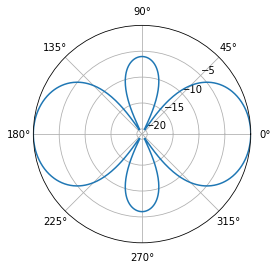

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def gain(d, w):
    """Return the power as a function of azimuthal angle, phi."""
    phi = np.linspace(0, 2*np.pi, 1000)
    psi = 2*np.pi * d / lam * np.cos(phi)
    j = np.arange(len(w))
    A = np.sum(w[j] * np.exp(j * 1j * psi[:, None]), axis=1)
    g = np.abs(A)**2
    return phi, g

def get_directive_gain(g, minDdBi=-20):
    """Return the "directive gain" of the antenna array producing gain g."""
    DdBi = 10 * np.log10(g / np.max(g))
    return np.clip(DdBi, minDdBi, None)

# Wavelength, antenna spacing, feed coefficients.
lam = 1
d = lam / 3
w = np.array([1, -1, 1])
# Calculate gain and directive gain; plot on a polar chart.
phi, g = gain(d, w)
DdBi = get_directive_gain(g)

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
ax.plot(phi, DdBi)
ax.set_rticks([-20, -15, -10, -5])
ax.set_rlabel_position(45)
plt.show()
fig.savefig('График коэффициента направленного действия (КНД) для системы из трех антенн.png', dpi=500)